# Section 02 project

In [26]:
!pip install pdpbox
!pip install shap
!pip install category_encoders
!pip install -U pandas-profiling
!pip install eli5
!pip install xgboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MinMaxScaler
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from eli5.sklearn import PermutationImportance
from pdpbox.pdp import pdp_isolate, pdp_plot
from scipy.stats import randint, uniform
from sklearn.impute import SimpleImputer
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Îç∞Ïù¥ÌÑ∞ ÏÑ†Ï†ï Î∞è Î¨∏Ï†ú ÏÑ§Ï†ï
- 'ÏÜåÎìùÏù¥ $50KÏù¥ ÎÑòÎäîÏßÄ ÏòàÏ∏°'ÌïòÎäî Í≤ÉÏùÑ Î¨∏Ï†úÎ°ú ÏÑ†Ï†ïÌï¥, ÏÜåÎìùÏù¥ 50KÏù¥ ÎÑòÎäî ÏÇ¨ÎûåÎì§Ïù¥ Ïñ¥Îñ§ ÌäπÏßïÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ ÌååÏïÖÌï† Í≤ÉÏù¥Îã§.

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('/content/drive/MyDrive/data/income_train.csv', encoding='cp949')
df.head().T

0              1                   2  \
age                           67             17                  31   
workclass                Private        Private             Private   
fnlwgt                    366425         244602              174201   
education              Doctorate           12th           Bachelors   
educational-num               16              8                  13   
marital-status          Divorced  Never-married  Married-civ-spouse   
occupation       Exec-managerial  Other-service     Exec-managerial   
relationship       Not-in-family      Own-child             Husband   
race                       White          White               White   
gender                      Male           Male                Male   
capital-gain               99999              0                   0   
capital-loss                   0              0                   0   
hours-per-week                60             15                  40   
native-country     United-States  United-States       United-States   
income_>50K                    1              0                   1   

                                  3              4  
age                              58             25  
workclass                 State-gov      State-gov  
fnlwgt                       110199         149248  
education                   7th-8th   Some-college  
educational-num                   4             10  
marital-status   Married-civ-spouse  Never-married  
occupation         Transport-moving  Other-service  
relationship                Husband  Not-in-family  
race                          White          Black  
gender                         Male           Male  
capital-gain                      0              0  
capital-loss                      0              0  
hours-per-week                   40             40  
native-country        United-States  United-States  
income_>50K                       0              0

## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ 

#### Ïª¨Îüº ÏÑ§Î™Ö

age : ÎÇòÏù¥

workclass : Í≥†Ïö© ÌòïÌÉú

fnlwgt : ÏÇ¨Îûå ÎåÄÌëúÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Í∞ÄÏ§ëÏπò (final weightÏùò ÏïΩÏûê)

education : ÍµêÏú° ÏàòÏ§Ä

education_num : ÍµêÏú° ÏàòÏ§Ä ÏàòÏπò

marital_status: Í≤∞Ìòº ÏÉÅÌÉú

occupation : ÏóÖÏ¢Ö

relationship : Í∞ÄÏ°± Í¥ÄÍ≥Ñ

race : Ïù∏Ï¢Ö

sex : ÏÑ±Î≥Ñ

capital_gain : ÏûêÎ≥∏Ïù¥Ïùµ

capital_loss : ÏûêÎ≥∏ÏÜêÏã§

hours_per_week : Ï£ºÎãπ Í∑ºÎ¨¥ ÏãúÍ∞Ñ

native_country : Íµ≠Ï†Å

income : ÏàòÏùµ 



In [ ]:
# Ïª¨Îüº ÌòïÌÉú ÌôïÏù∏ÌïòÍ∏∞
print('df: \n', df.dtypes)

df: 
 age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income_>50K         int64
dtype: object


In [4]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏& Ï§ëÎ≥µ ÌôïÏù∏
print('Í≤∞Ï∏°Ïπò: \n',df.isna().sum())
print('Ï§ëÎ≥µ: ', df.duplicated().sum())
df.shape

Í≤∞Ï∏°Ïπò: 
 age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64
Ï§ëÎ≥µ:  45


(43957, 15)

In [3]:
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df.dropna(inplace=True)
print('Í≤∞Ï∏°Ïπò: \n',df.isna().sum())

Í≤∞Ï∏°Ïπò: 
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64


In [4]:
# trainÏóêÏÑú Ï§ëÎ≥µÏù¥ ÌôïÏù∏ÎêòÏóàÏúºÎØÄÎ°ú Ï§ëÎ≥µÍ∞íÏùÄ ÌïòÎÇòÎßå ÎÇ®Í∏∞Í≥† Ï†úÍ±∞
df = df.drop_duplicates(keep = 'first')
print('df Ï§ëÎ≥µ: ', df.duplicated().sum())

df Ï§ëÎ≥µ:  0


## EDA Î∞è Feature Engineering

In [1]:
# import pandas_profiling
# pandas_profiling.__version__
# pr = df.profile_report() 
# pr

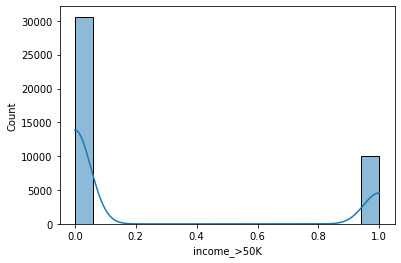

In [7]:
# ÌÉÄÍ≤üÎ≥ÄÏàòÏùò Î∂ÑÌè¨ÎèÑ
sns.histplot(df['income_>50K'],kde=True);

In [8]:
# ÏûêÎ≥∏ Ï¥ùÌï©Í≥ÑÎùºÎäî new column: "total_capital" ÏÉùÏÑ±
def to(df):
  df['capital-loss'] = -df['capital-loss'] # ÏûêÎ≥∏ ÏÜêÏã§ÏùÑ ÏùåÏàòÎ°ú Î≥ÄÌôò
  
  df['total_capital'] = df['capital-gain'] + df['capital-loss']
  return df

df = to(df)

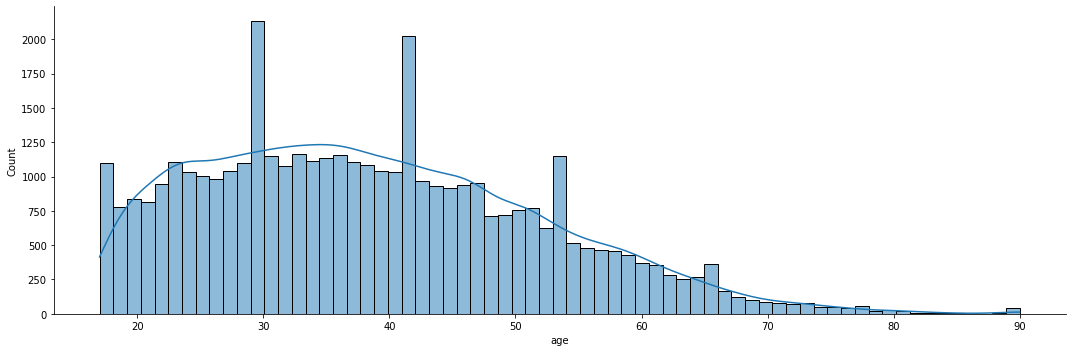

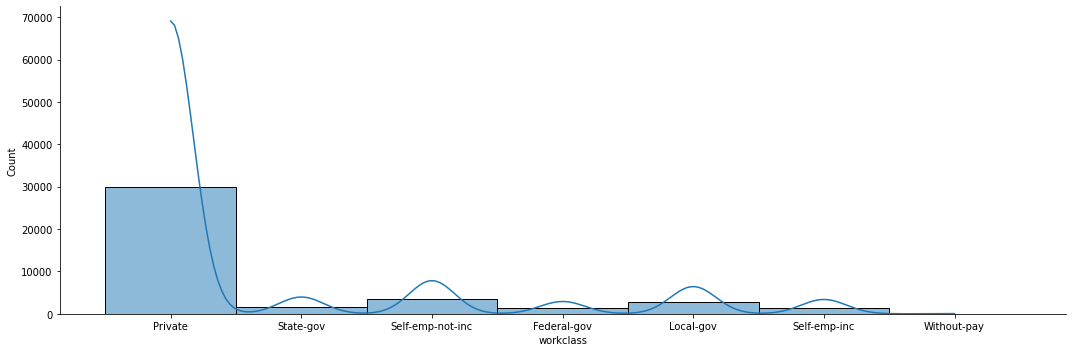

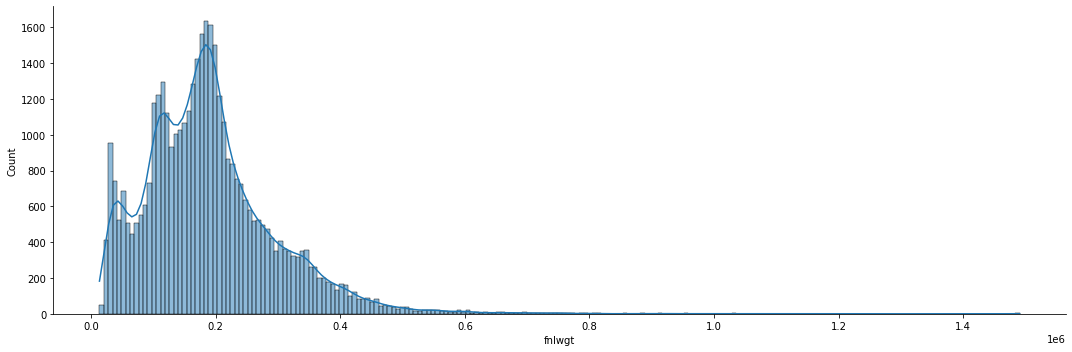

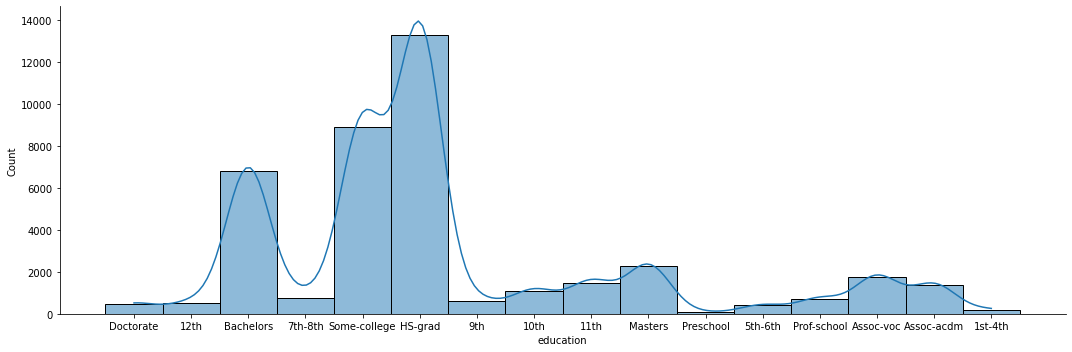

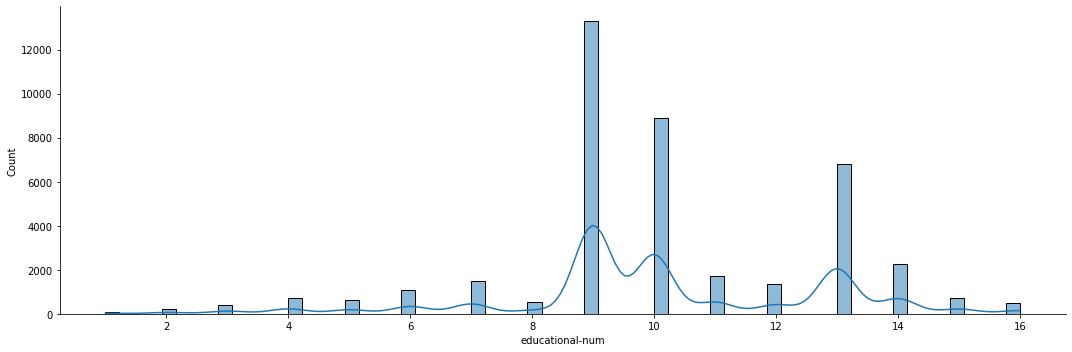

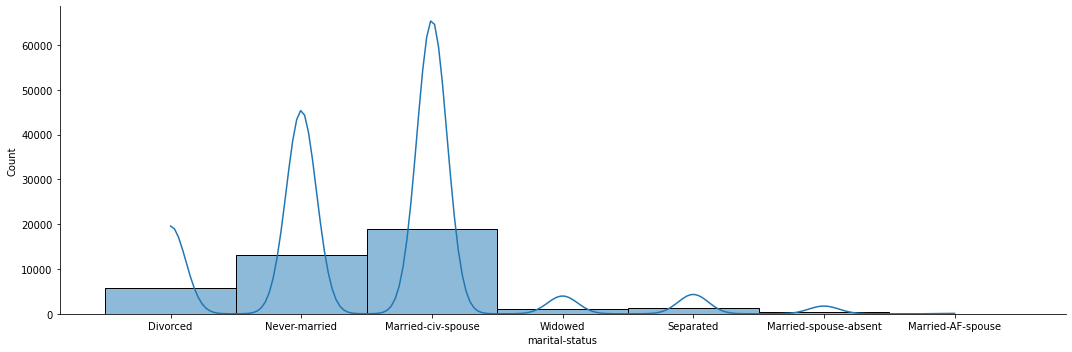

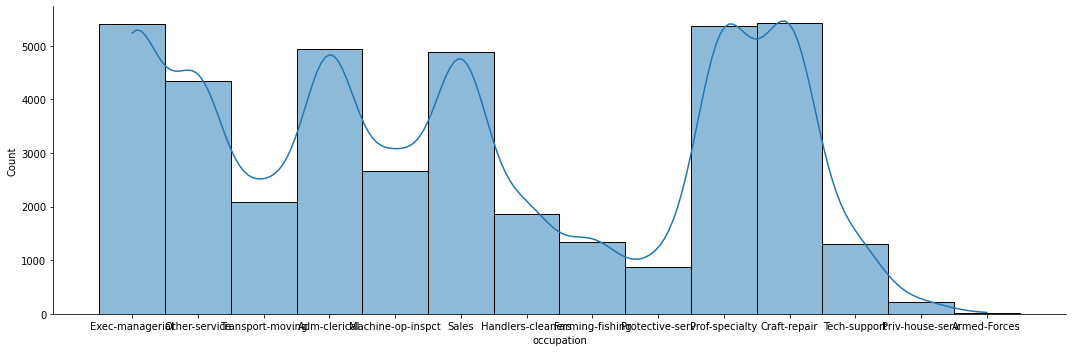

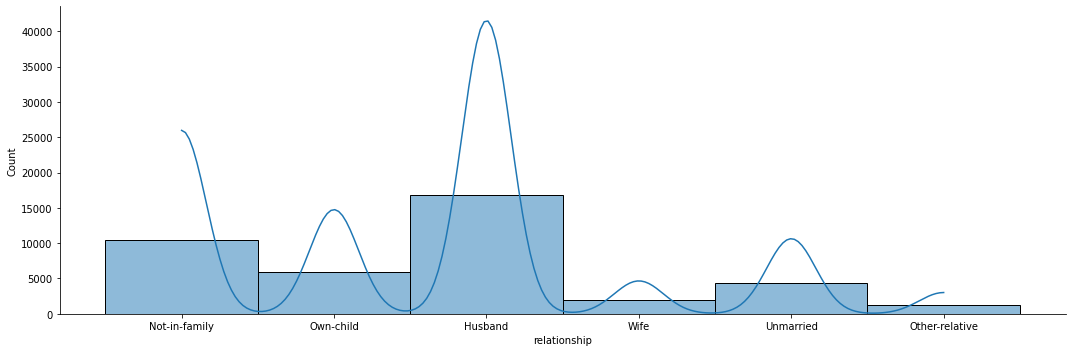

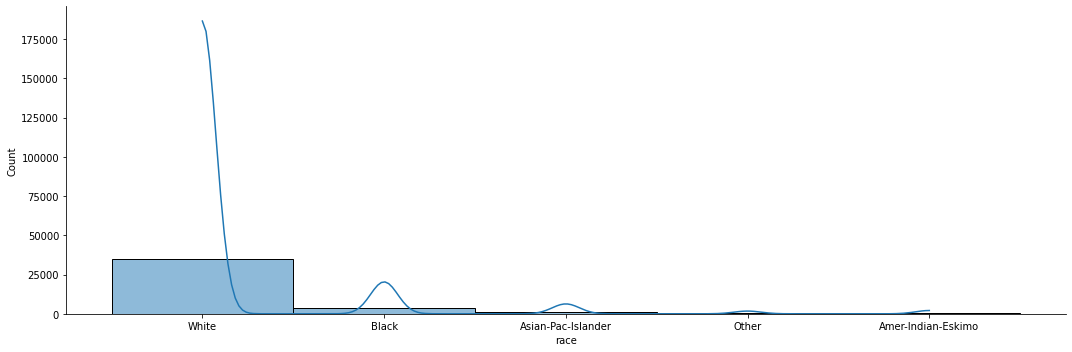

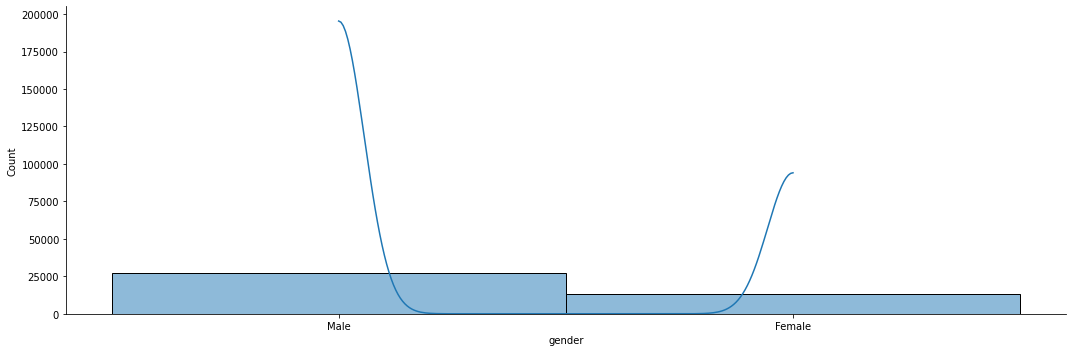

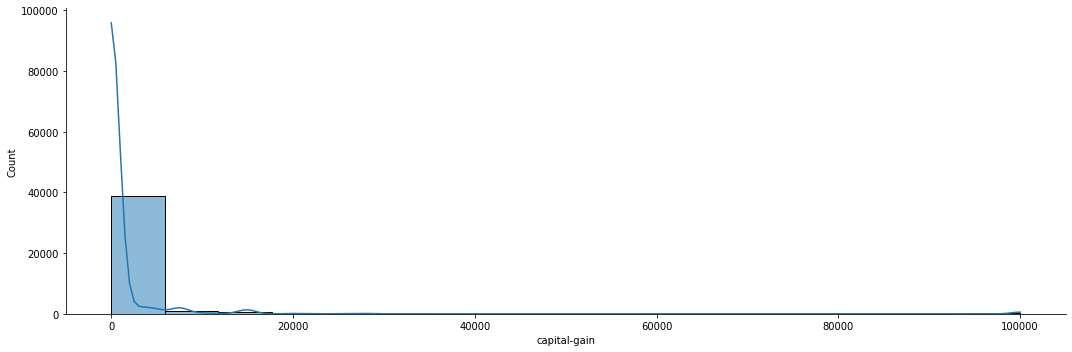

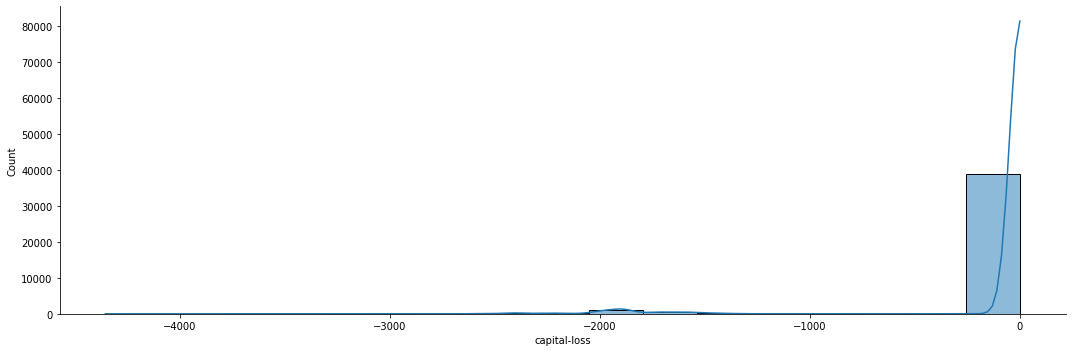

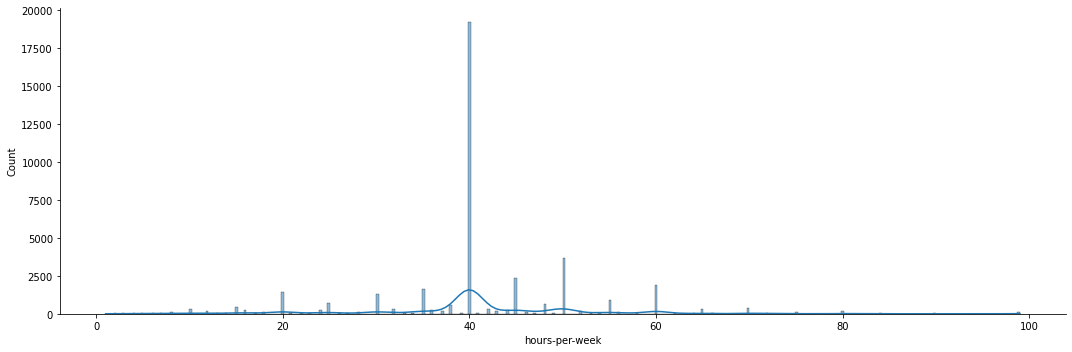

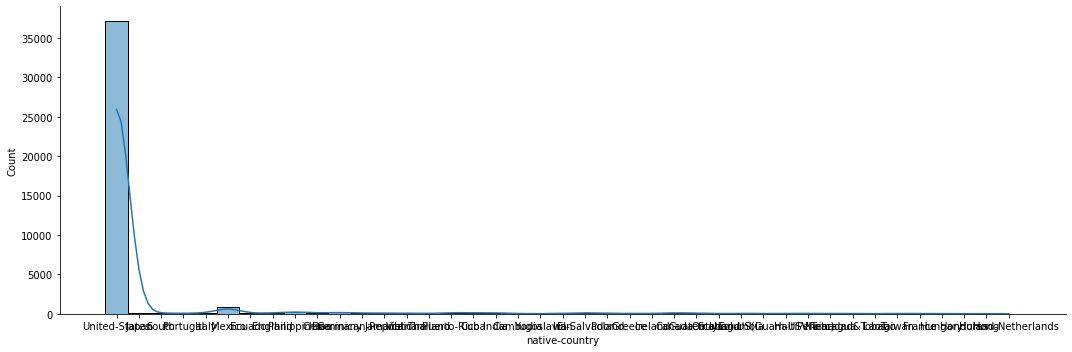

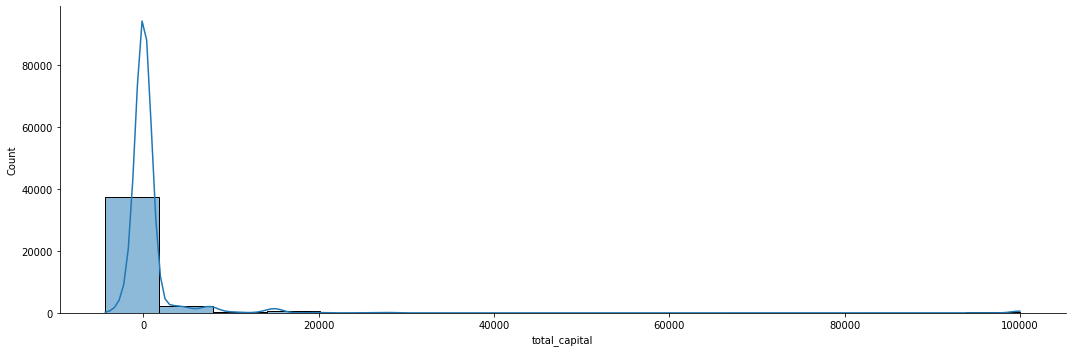

In [9]:
# Í∞Å ÌäπÏÑ±Îì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
colss = df.drop(['income_>50K'],axis=1).columns
for i in colss:
  sns.displot(df[i], height = 5, aspect = 3, kde=True);

In [10]:
# ÌäπÏ†ï Ïª¨ÎüºÏùò Ïπ¥ÌÖåÍ≥†Î¶¨ ÌôïÏù∏
unicol = df.drop(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_>50K'], axis=1).columns
for i in unicol:
    print(i, df[i].unique())

workclass ['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
education ['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 'Assoc-acdm' '1st-4th']
marital-status ['Divorced' 'Never-married' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-specialty' 'Craft-repair' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces']
relationship ['Not-in-family' 'Own-child' 'Husband' 'Wife' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' 'Japan' 'South' 'Portugal' 'Italy' 'Mexico' 'Ecuador'
 'England' 'Philippines' 'China' 'Germany' 'Dominican-Rep

In [11]:
def cate(df):
  # marital-status Î≤îÏ£º Ïù¥Î¶Ñ Ï°∞Ï†ï
  df = df.replace(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent', 'Divorced', 'Never-married', 'Widowed', 'Separated'], 
                  [1, 1, 1, 0, 0, 0, 0])
  
  # educationÏù¥Îûë educational-numÏù¥ ÏÑúÎ°ú Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÏñ¥ Ï†ÑÏûêÎ•º ÎìúÎûçÌïòÍ∏∞
  df = df.drop('education', axis=1)

  return df

df = cate(df)

In [12]:
df.head().T

0              1                2  \
age                           67             17               31   
workclass                Private        Private          Private   
fnlwgt                    366425         244602           174201   
educational-num               16              8               13   
marital-status                 0              0                1   
occupation       Exec-managerial  Other-service  Exec-managerial   
relationship       Not-in-family      Own-child          Husband   
race                       White          White            White   
gender                      Male           Male             Male   
capital-gain               99999              0                0   
capital-loss                   0              0                0   
hours-per-week                60             15               40   
native-country     United-States  United-States    United-States   
income_>50K                    1              0                1   
total_capital              99999              0                0   

                                3              4  
age                            58             25  
workclass               State-gov      State-gov  
fnlwgt                     110199         149248  
educational-num                 4             10  
marital-status                  1              0  
occupation       Transport-moving  Other-service  
relationship              Husband  Not-in-family  
race                        White          Black  
gender                       Male           Male  
capital-gain                    0              0  
capital-loss                    0              0  
hours-per-week                 40             40  
native-country      United-States  United-States  
income_>50K                     0              0  
total_capital                   0              0

In [13]:
# summary statistics ÌôïÏù∏
df.describe()

age        fnlwgt  educational-num  marital-status  \
count  40686.000000  4.068600e+04     40686.000000    40686.000000   
mean      38.529101  1.897858e+05        10.114585        0.479059   
std       13.240418  1.059153e+05         2.555784        0.499567   
min       17.000000  1.349200e+04         1.000000        0.000000   
25%       28.000000  1.173630e+05         9.000000        0.000000   
50%       37.000000  1.782635e+05        10.000000        0.000000   
75%       47.000000  2.380632e+05        13.000000        1.000000   
max       90.000000  1.490400e+06        16.000000        1.000000   

       capital-gain  capital-loss  hours-per-week   income_>50K  total_capital  
count  40686.000000  40686.000000    40686.000000  40686.000000   40686.000000  
mean    1119.767217    -89.333382       40.912796      0.247923    1030.433835  
std     7643.607251    406.763825       12.014326      0.431812    7667.480598  
min        0.000000  -4356.000000        1.000000      0.000000   -4356.000000  
25%        0.000000      0.000000       40.000000      0.000000       0.000000  
50%        0.000000      0.000000       40.000000      0.000000       0.000000  
75%        0.000000      0.000000       45.000000      0.000000       0.000000  
max    99999.000000      0.000000       99.000000      1.000000   99999.000000

## Í∞ÄÏÑ§ ÏÑ§Ï†ï Î∞è Í≤ÄÏ†ï
### 1. Í∞ÄÏÑ§
Í∞ÄÏÑ§ 1: Ï£ºÎãπ Í∑ºÎ¨¥ ÏãúÍ∞ÑÏù¥ ÎßéÏùÑÏàòÎ°ù ÏÜåÎìù>$50000Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.

Í∞ÄÏÑ§ 2: Îçî  ÎßéÏùÄ ÍµêÏú°ÏùÑ Î∞õÏùÄ ÏÇ¨ÎûåÏù¥ ÏÜåÎìù>$50000Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.

Í∞ÄÏÑ§ 3: Í≥†Ïö© ÌòïÌÉúÍ∞Ä ÏÜåÎìùÏóê ÏòÅÌñ•ÏùÑ Ï§Ñ Í≤ÉÏù¥Îã§.(ÏùºÌïòÏßÄ ÏïäÎäî Ïù¥Îäî ÏÜåÎìù>$50000Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÇÆÎã§.)

### Í∞ÄÏÑ§ 1: Ï£ºÎãπ Í∑ºÎ¨¥ ÏãúÍ∞ÑÏù¥ ÎßéÏùÑÏàòÎ°ù ÏÜåÎìù>$50000Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§

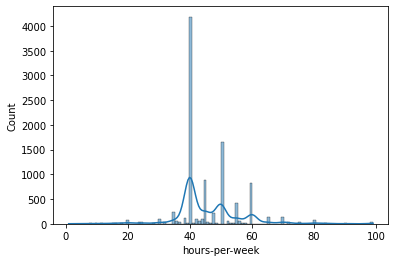

In [14]:
# Í∞ÄÏÑ§ 1
rich = df[df['income_>50K'] == 1]
sns.histplot(rich['hours-per-week'],kde=True);

- ÏÉÅÎã®Ïùò Î∂ÑÌè¨ÎèÑÎ•º ÌÜµÌï¥ Ï£ºÎãπ Í∑ºÎ¨¥ ÏãúÍ∞ÑÏù¥ ÎßéÏùÑÏàòÎ°ù ÏÜåÎìù>$50000Ïùº Í≤ÉÏù¥ÎùºÎäî Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÄ Í∏∞Í∞ÅÌï† Ïàò ÏûàÎã§.

- Ï£ºÎãπ Í∑ºÎ¨¥ÏãúÍ∞ÑÏù¥ 40~60ÏãúÍ∞ÑÏù∏ Í≤ΩÏö∞ ÏÜåÎìù>$50000Ïóê Í∞ÄÏû• ÎßéÏù¥ Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎã§.


### Í∞ÄÏÑ§ 2: Îçî  ÎßéÏùÄ ÍµêÏú°ÏùÑ Î∞õÏùÄ ÏÇ¨ÎûåÏù¥ ÏÜåÎìù>$50000Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§.

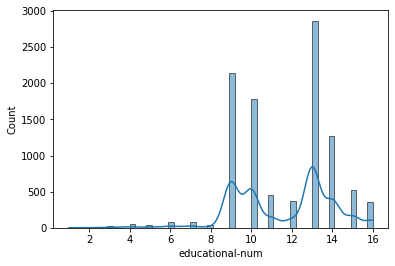

In [15]:
# Í∞ÄÏÑ§ 2
sns.histplot(rich['educational-num'],kde=True);

- Î∂ÑÌè¨ÎèÑÏóêÏÑú Ïïå Ïàò ÏûàÎìØ, ÍµêÏú°ÏàòÏ§ÄÏù¥ 9~14Ïùº Îïå ÏÜåÎìù>$50000Ïù∏ ÏÇ¨ÎûåÏù¥ Í∞ÄÏû• ÎßéÏù¥ Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÎã§.
- Îî∞ÎùºÏÑú Í∞ÄÏÑ§ 2Í∞Ä Ïñ¥Îäê Ï†ïÎèÑ Î∞õÏïÑÎì§Ïó¨Ïßà Ïàò ÏûàÎã§.

### Í∞ÄÏÑ§ 3: Í≥†Ïö© ÌòïÌÉúÍ∞Ä ÏÜåÎìùÏóê ÏòÅÌñ•ÏùÑ Ï§Ñ Í≤ÉÏù¥Îã§.(ÏÜåÎìùÏù¥ ÏóÜÎäî Ïù¥Îäî ÏÜåÎìù>$50000Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÇÆÎã§.)


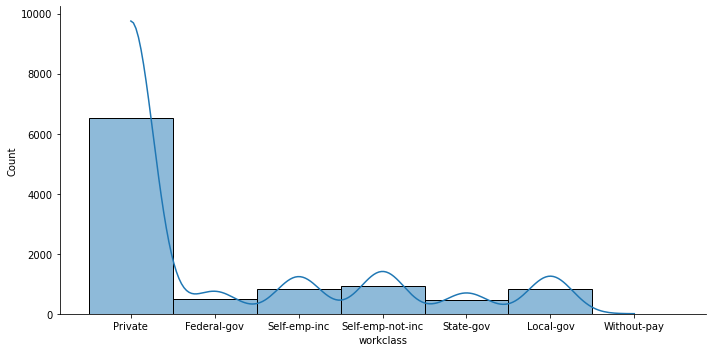

In [16]:
# Í∞ÄÏÑ§ 3
sns.displot(rich['workclass'], height = 5, aspect = 2,kde=True);

- ÏÉÅÎã®Ïùò Î∂ÑÌè¨Î•º ÌÜµÌï¥ ÏÜåÎìù>$50000Ïù∏ ÏÇ¨ÎûåÏùÄ ÎåÄÎ∂ÄÎ∂Ñ Ïñ¥Îñ§ ÌòïÌÉúÎ°ú Í≥†Ïö©Îêú Ïù¥Îì§Ïù¥Î©∞, ÏùºÌïòÏßÄ ÏïäÎäî ÏÇ¨ÎûåÏùÑ Î≥¥Ïó¨Ï£ºÎäî never-workedÎäî Ïù¥Ïóê Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏßÄ ÏïäÎã§.

## Baseline model ÏÑ§Ï†ï

- ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ delayÏùò ÏµúÎπàÍ∞íÏùò Ï†ïÌôïÎèÑ 0.760589Î°ú ÏÑ§Ï†ïÌïòÏòÄÎã§.

In [17]:
# baseline
df['income_>50K'].value_counts(normalize=True) 

0    0.752077
1    0.247923
Name: income_>50K, dtype: float64

In [18]:
# Î∂àÍ∑†Ìòï ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò 
ratio = 0.752077/0.247923

## Î™®Îç∏ ÌïôÏäµ
### Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï†


In [19]:
target = 'income_>50K'
feature = df.drop(columns=[target]).columns

# test/train/valÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨Î∂ÑÌïòÍ∏∞
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=2)
train, val = train_test_split(train, random_state=2)

# ÌõàÎ†®ÏÑ∏Ìä∏-ÎèÖÎ¶Ω/Ï¢ÖÏÜçÎ≥ÄÏàò ÏßÄÏ†ï + ÌÖåÏä§Ìä∏ÏÑ∏Ìä∏-ÎèÖÎ¶Ω/Ï¢ÖÏÜçÎ≥ÄÏàò ÏßÄÏ†ï
X_train = train[feature]
y_train = train[target]
X_test = test[feature]
y_test = test[target]
X_val = val[feature]
y_val = val[target]

In [20]:
train.shape, val.shape, test.shape

((22885, 15), (7629, 15), (10172, 15))


### 1Ï∞® model: `Logistic Regression`

In [21]:
# 1Ï∞® Í∏∞Î≥∏Î™®Îç∏: logistic regression
from sklearn.linear_model import LogisticRegression
log = make_pipeline( 
    OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression()
)

log.fit(X_train, y_train)
y_pred = log.predict(X_val)
print('ÌõàÎ†® Ï†ïÌôïÎèÑ', log.score(X_train, y_train))
print('Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ', log.score(X_val, y_val))
print('Report \n',classification_report(y_val, y_pred))
print('f1 Ïä§ÏΩîÏñ¥',f1_score(y_val, y_pred))
print('aucÏ†êÏàò : ', roc_auc_score(y_val, y_pred))

ÌõàÎ†® Ï†ïÌôïÎèÑ 0.7967664409001529
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ 0.7913225848735089
Report 
               precision    recall  f1-score   support

           0       0.80      0.97      0.87      5718
           1       0.73      0.27      0.39      1911

    accuracy                           0.79      7629
   macro avg       0.76      0.62      0.63      7629
weighted avg       0.78      0.79      0.75      7629

f1 Ïä§ÏΩîÏñ¥ 0.3919022154316272
aucÏ†êÏàò :  0.6172589465199269


- logistic regression Î™®Îç∏ÏùÄ ÌÉÄÍ≤ü=0Í≥º ÌÉÄÍ≤ü=1Ïùò f1 Ïä§ÏΩîÏñ¥Ïùò Ï∞®Ïù¥Í∞Ä ÌÅ¨Í∏∞ ÎïåÎ¨∏Ïóê Ï†ÅÌï©ÌïòÏßÄ ÏïäÎã§.


### 1Ï∞® model: `Random Forest`

In [22]:
# 1Ï∞® Í∏∞Î≥∏Î™®Îç∏: RF
pipe = make_pipeline( 
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=100, class_weight = 'balanced', random_state=2)
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
print('ÌõàÎ†® Ï†ïÌôïÎèÑ', pipe.score(X_train, y_train))
print('Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ', pipe.score(X_val, y_val))
print('Report \n',classification_report(y_val, y_pred))
print('f1 Ïä§ÏΩîÏñ¥',f1_score(y_val, y_pred))
print('aucÏ†êÏàò : ', roc_auc_score(y_val, y_pred))

ÌõàÎ†® Ï†ïÌôïÎèÑ 1.0
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ 0.8547647135928693
Report 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      5718
           1       0.76      0.61      0.68      1911

    accuracy                           0.85      7629
   macro avg       0.82      0.77      0.79      7629
weighted avg       0.85      0.85      0.85      7629

f1 Ïä§ÏΩîÏñ¥ 0.679212507237985
aucÏ†êÏàò :  0.7745534084163974


- RF Î™®Îç∏ÏóêÏÑúÎäî Ï†Ñ Î™®Îç∏Ïóê ÎπÑÌï¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÌÉÄÍ≤üÏù¥ 0, 1Ïùº ÎïåÏùò f1 Ïä§ÏΩîÏñ¥Ïùò Ï∞®Ïù¥Í∞Ä Ï§ÑÏóàÏßÄÎßå ÌõàÎ†® Ï†ïÌôïÎèÑÏôÄ Í≤ÄÏ¶ù Ï†ïÌôïÎèÑÏùò Í∞í Í∞ÑÏùò Ï∞®Ïù¥Í∞Ä Îã§ÏÜå Ï°¥Ïû¨Ìï¥ Í≥ºÏ†ÅÌï©ÏùÑ ÏùòÏã¨Ìï¥Î≥º Ïàò ÏûàÎã§.


### 1Ï∞® model: `Catboost` 

In [24]:
# 1Ï∞® Í∏∞Î≥∏Î™®Îç∏: catboost
from catboost import CatBoostClassifier

pipe_cat = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    CatBoostClassifier(scale_pos_weight=ratio, random_state=2))

pipe_cat.fit(X_train, y_train)
y_predc = pipe_cat.predict(X_val)
print('ÌõàÎ†® Ï†ïÌôïÎèÑ', pipe_cat.score(X_train, y_train))
print('Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ', pipe_cat.score(X_val, y_val))
print('Report \n',classification_report(y_val, y_predc))
print('f1 Ïä§ÏΩîÏñ¥',f1_score(y_val, y_predc))
print('aucÏ†êÏàò : ', roc_auc_score(y_val, y_predc))

Learning rate set to 0.039216
0:	learn: 0.6638642	total: 59.2ms	remaining: 59.1s
1:	learn: 0.6385457	total: 78ms	remaining: 38.9s
2:	learn: 0.6141264	total: 93.9ms	remaining: 31.2s
3:	learn: 0.5924599	total: 107ms	remaining: 26.5s
4:	learn: 0.5744012	total: 121ms	remaining: 24.1s
5:	learn: 0.5581008	total: 143ms	remaining: 23.6s
6:	learn: 0.5440804	total: 149ms	remaining: 21.1s
7:	learn: 0.5322902	total: 155ms	remaining: 19.2s
8:	learn: 0.5205974	total: 161ms	remaining: 17.8s
9:	learn: 0.5075603	total: 168ms	remaining: 16.6s
10:	learn: 0.4963241	total: 175ms	remaining: 15.7s
11:	learn: 0.4866846	total: 181ms	remaining: 14.9s
12:	learn: 0.4784438	total: 192ms	remaining: 14.6s
13:	learn: 0.4721736	total: 199ms	remaining: 14s
14:	learn: 0.4658256	total: 206ms	remaining: 13.5s
15:	learn: 0.4591296	total: 212ms	remaining: 13s
16:	learn: 0.4539825	total: 219ms	remaining: 12.7s
17:	learn: 0.4495675	total: 226ms	remaining: 12.3s
18:	learn: 0.4451080	total: 233ms	remaining: 12s
19:	learn: 0.440

- catboost Î™®Îç∏ÏùÄ Ï†Ñ Î™®Îç∏Îì§Ïóê ÎπÑÌï¥ ÌÉÄÍ≤üÏùò Í∞íÏóê Îî∞Î•∏ f1 Ïä§ÏΩîÏñ¥ÏôÄ Î™®Îç∏Ïùò f1 Ïä§ÏΩîÏñ¥, auc Ï†êÏàò Î™®Îëê Í∞ÄÏû• ÎÜíÎã§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÎã§.
- 2Ï∞® Î™®Îç∏ ÌïôÏäµÏóêÏÑúÎäî XGBoost, Catboost Î™®Îç∏ÏùÑ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ ÌÜµÌï¥ ÏÑ±Îä•ÏùÑ ÎÜíÏùº Í≤ÉÏù¥Îã§.

## 2. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï°∞Ï†ïÌïú Î™®Îç∏ ÌïôÏäµ
### 2-1. `Catboost`

In [27]:
pipe_cat = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    CatBoostClassifier(scale_pos_weight=ratio, random_state=2)
)

distscat = {
    'ordinalencoder__handle_missing': ['value'],
    'simpleimputer__strategy': ['mean', 'median'], 
    'catboostclassifier__learning_rate': [0.01, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.05, 0.4], 
    'catboostclassifier__max_depth': randint(0, 10),
    'catboostclassifier__n_estimators': randint(50, 500)
}

clf = RandomizedSearchCV(
    pipe_cat, 
    param_distributions=distscat, 
    n_iter=30, 
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 30 candidates, totalling 90 fits
0:	learn: 0.6230042	total: 7.59ms	remaining: 3.73s
1:	learn: 0.5724090	total: 14.9ms	remaining: 3.66s
2:	learn: 0.5321847	total: 21.4ms	remaining: 3.5s
3:	learn: 0.5008401	total: 28.1ms	remaining: 3.43s
4:	learn: 0.4793425	total: 34.9ms	remaining: 3.41s
5:	learn: 0.4599523	total: 41.7ms	remaining: 3.38s
6:	learn: 0.4465130	total: 48.3ms	remaining: 3.35s
7:	learn: 0.4358932	total: 55.3ms	remaining: 3.35s
8:	learn: 0.4276154	total: 62ms	remaining: 3.34s
9:	learn: 0.4203522	total: 69.2ms	remaining: 3.34s
10:	learn: 0.4142872	total: 81ms	remaining: 3.55s
11:	learn: 0.4104912	total: 92ms	remaining: 3.69s
12:	learn: 0.4066840	total: 98.4ms	remaining: 3.63s
13:	learn: 0.4030286	total: 105ms	remaining: 3.6s
14:	learn: 0.3998907	total: 112ms	remaining: 3.58s
15:	learn: 0.3971100	total: 119ms	remaining: 3.55s
16:	learn: 0.3948852	total: 126ms	remaining: 3.52s
17:	learn: 0.3928447	total: 133ms	remaining: 3.5s
18:	learn: 0.3901371	total:

In [28]:
print('ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞: ', clf.best_params_)

ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:  {'catboostclassifier__learning_rate': 0.1, 'catboostclassifier__max_depth': 6, 'catboostclassifier__n_estimators': 493, 'ordinalencoder__handle_missing': 'value', 'simpleimputer__strategy': 'mean'}


In [29]:
pipe_ca = clf.best_estimator_
y_val_predca = pipe_ca.predict(X_val)
y_train_predca = pipe_ca.predict(X_train)
print('ÌõàÎ†® f1 score: ', f1_score(y_train, y_train_predca))
print('Í≤ÄÏ¶ù f1 score: ', f1_score(y_val, y_val_predca))
print('Report \n',classification_report(y_val, y_val_predca))
print('aucÏ†êÏàò : ', roc_auc_score(y_val, y_val_predca))

ÌõàÎ†® f1 score:  0.7790021426385063
Í≤ÄÏ¶ù f1 score:  0.7227004984141367
Report 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89      5718
           1       0.64      0.83      0.72      1911

    accuracy                           0.84      7629
   macro avg       0.79      0.84      0.80      7629
weighted avg       0.86      0.84      0.85      7629

aucÏ†êÏàò :  0.8379223834178113


- 1Ï∞®Î™®Îç∏Î≥¥Îã§ auc Ïä§ÏΩîÏñ¥, f1 score Î™®Îëê ÎÜíÍ≥†, Í≥ºÏ†ÅÌï©Ïùò Í∞ÄÎä•ÏÑ± ÎòêÌïú ÎÇÆÏúºÎØÄÎ°ú 2Ï∞® ÌïôÏäµÌïú `Catboost` Î™®Îç∏ÏùÑ ÏµúÏ¢Ö Î™®Îç∏Î°ú ÏÑ†ÌÉùÌïúÎã§.

### 2-2. ROC curve & AUC score

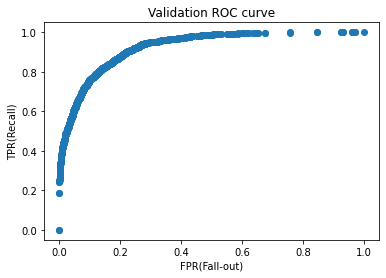

In [30]:
from sklearn.metrics import roc_curve

y_pred_proba = pipe_ca.predict_proba(X_val)[:, 1]

# roc_curve(ÌÉÄÍ≤üÍ∞í, prob of 1)
fprv, tprv, thresholdsv = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fprv, 
    'TPRate(Recall)': tprv, 
    'Threshold': thresholdsv
})

plt.scatter(fprv, tprv)
plt.title('Validation ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

idx: 1059 , threshold: 0.37478910754021555


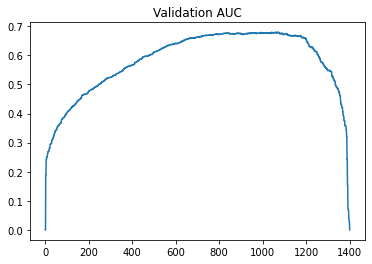

In [31]:
# ÏµúÏ†ÅÏùò threshold & AUC
optimal_idxv = np.argmax(tprv - fprv)
optimal_thresholdv = thresholdsv[optimal_idxv]

print('idx:', optimal_idxv, ', threshold:', optimal_thresholdv)
plt.title('Validation AUC')
plt.plot(tprv-fprv);

In [32]:
# threshold ÏÑ§Ï†ï Î∞è Î†àÌè¨Ìä∏
y_v_pred_optimal = y_pred_proba >= optimal_thresholdv
print('Report \n',classification_report(y_val, y_v_pred_optimal))

# auc Ï†êÏàò
auc_score = roc_auc_score(y_val, y_v_pred_optimal)
print('Í≤ÄÏ†ï Ï†ïÌôïÎèÑ', pipe_ca.score(X_val, y_val))
print('val_f1 Ïä§ÏΩîÏñ¥',f1_score(y_val, y_v_pred_optimal))
print('val_aucÏ†êÏàò : ', auc_score)

Report 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86      5718
           1       0.58      0.90      0.70      1911

    accuracy                           0.81      7629
   macro avg       0.77      0.84      0.78      7629
weighted avg       0.86      0.81      0.82      7629

Í≤ÄÏ†ï Ï†ïÌôïÎèÑ 0.8395595753047581
val_f1 Ïä§ÏΩîÏñ¥ 0.7030451665644798
val_aucÏ†êÏàò :  0.8396728939376219


## ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ ÏÑ±Îä• ÌèâÍ∞Ä

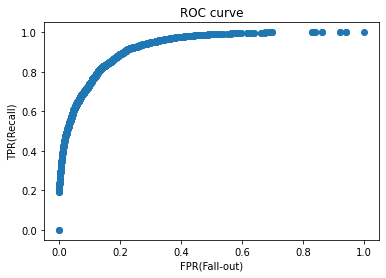

In [33]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î™®Îç∏Ïóê ÎÑ£Ïñ¥ÏÑú roc curve
y_test_pred_proba = pipe_ca.predict_proba(X_test)[:, 1]

# roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})

plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');

idx: 1389 , test_threshold: 0.421078416524647


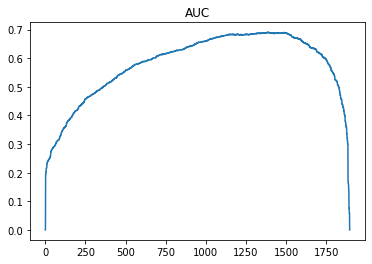

In [34]:
# ÏµúÏ†ÅÏùò threshold & AUC
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', test_threshold:', optimal_threshold)
plt.title('AUC')
plt.plot(tpr-fpr);

In [35]:
# threshold ÏÑ§Ï†ï Î∞è Î†àÌè¨Ìä∏
y_test_pred_optimal = y_test_pred_proba >= optimal_threshold
print('Report \n',classification_report(y_test, y_test_pred_optimal))

# auc Ï†êÏàò
auc_score = roc_auc_score(y_test, y_test_pred_optimal)
print('ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ', pipe_ca.score(X_test, y_test))
print('test_f1 Ïä§ÏΩîÏñ¥',f1_score(y_test, y_test_pred_optimal))
print('test_aucÏ†êÏàò : ', auc_score)

Report 
               precision    recall  f1-score   support

           0       0.95      0.80      0.87      7545
           1       0.61      0.89      0.72      2627

    accuracy                           0.82     10172
   macro avg       0.78      0.85      0.80     10172
weighted avg       0.86      0.82      0.83     10172

ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ 0.8394612662209988
test_f1 Ïä§ÏΩîÏñ¥ 0.7235759739251901
test_aucÏ†êÏàò :  0.8452524290874472


## Î∂ÑÏÑù Î∞è Í≤∞Î°†
### 1. ÌäπÏÑ± Ï§ëÏöîÎèÑ & ÏàúÏó¥ Ï§ëÏöîÎèÑ

0:	learn: 0.5883565	total: 6.27ms	remaining: 1.92s
1:	learn: 0.5286450	total: 12.3ms	remaining: 1.88s
2:	learn: 0.4806876	total: 17.7ms	remaining: 1.8s
3:	learn: 0.4530558	total: 23.6ms	remaining: 1.79s
4:	learn: 0.4371177	total: 29.6ms	remaining: 1.8s
5:	learn: 0.4287347	total: 35.4ms	remaining: 1.78s
6:	learn: 0.4211998	total: 40.9ms	remaining: 1.76s
7:	learn: 0.4150904	total: 46.5ms	remaining: 1.74s
8:	learn: 0.4108294	total: 52.4ms	remaining: 1.74s
9:	learn: 0.4073468	total: 58.2ms	remaining: 1.73s
10:	learn: 0.4029716	total: 64.1ms	remaining: 1.73s
11:	learn: 0.3992464	total: 69.7ms	remaining: 1.72s
12:	learn: 0.3961288	total: 75.3ms	remaining: 1.71s
13:	learn: 0.3939351	total: 80.9ms	remaining: 1.7s
14:	learn: 0.3907164	total: 86ms	remaining: 1.68s
15:	learn: 0.3887329	total: 91.6ms	remaining: 1.67s
16:	learn: 0.3869777	total: 97.3ms	remaining: 1.67s
17:	learn: 0.3856231	total: 103ms	remaining: 1.66s
18:	learn: 0.3833571	total: 109ms	remaining: 1.66s
19:	learn: 0.3822809	total: 1

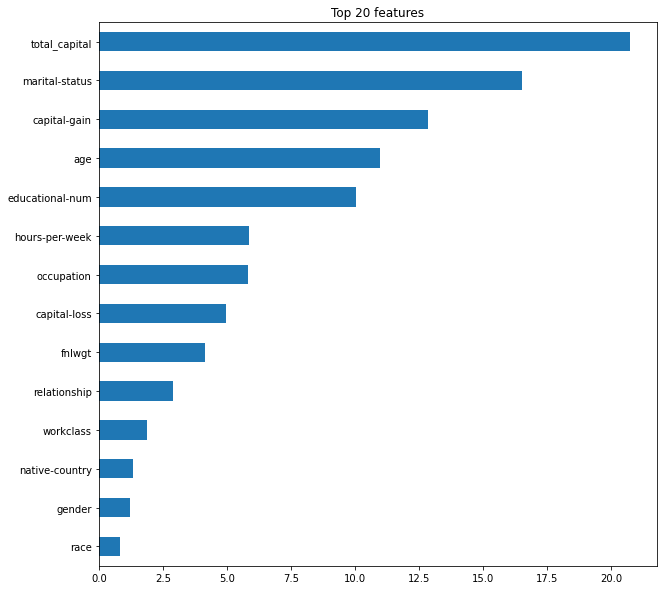

In [36]:
# feature importance
processor = make_pipeline(
    OrdinalEncoder(handle_missing='value'), 
    SimpleImputer(strategy='mean')
)
X_train_processed = processor.fit_transform(X_train)
X_val_processed = processor.transform(X_val)

model = CatBoostClassifier(learning_rate=0.2, max_depth= 4, n_estimators=308, 
                           scale_pos_weight=ratio, random_state=2).fit(X_train_processed, y_train)

importances = pd.Series(model.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [39]:
# permutation importance
permuter = PermutationImportance(model, 
    scoring='f1', # metric
    n_iter=5, # Îã§Î•∏ random seedÎ•º ÏÇ¨Ïö©ÌïòÏó¨ 5Î≤à Î∞òÎ≥µ
    random_state=2
).fit(X_val_processed, y_val)

feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

race              -0.001530
native-country     0.001914
fnlwgt             0.002029
workclass          0.004713
capital-loss       0.008691
occupation         0.014004
hours-per-week     0.015994
relationship       0.018030
gender             0.019383
total_capital      0.032142
capital-gain       0.036678
age                0.041880
educational-num    0.042649
marital-status     0.065737
dtype: float64

In [40]:
import eli5
eli5.show_weights(
    permuter, 
    top=None, # top n ÏßÄÏ†ï Í∞ÄÎä•, None Ïùº Í≤ΩÏö∞ Î™®Îì† ÌäπÏÑ± 
    feature_names=feature_names # list ÌòïÏãùÏúºÎ°ú ÎÑ£Ïñ¥Ïïº Ìï©ÎãàÎã§
)

## 2. PDP
- ÏàúÏó¥Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ 5Í∞úÏùò PDP ÌôïÏù∏Ìï¥ ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ Ïñ¥Îñ§ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäîÏßÄ ÌôïÏù∏Ìï† Í≤ÉÏù¥Îã§.

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


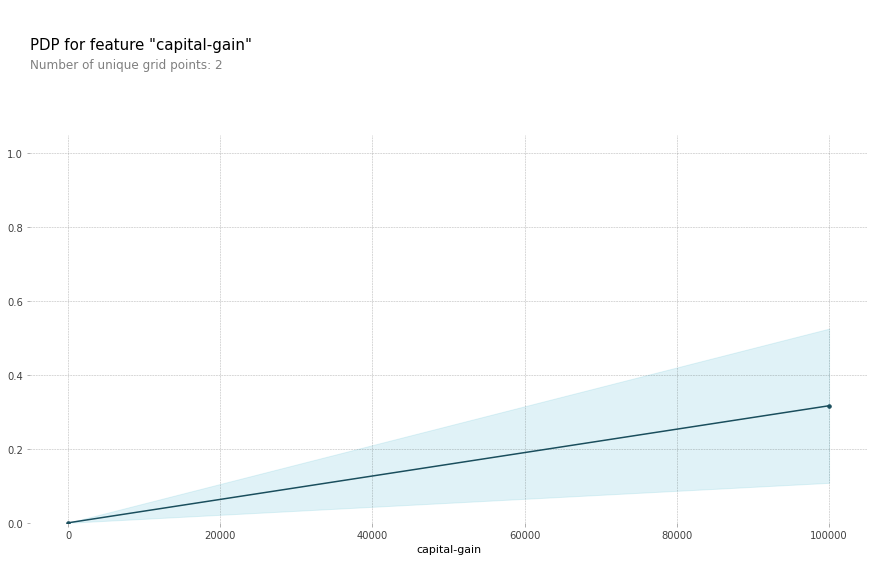

In [41]:
# Partial Dependence Plot: capital-gain
encoder = OrdinalEncoder(handle_missing='value')
X_train_encoded = encoder.fit_transform(X_train)

from pdpbox import pdp
feature = 'capital-gain'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=X_train_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

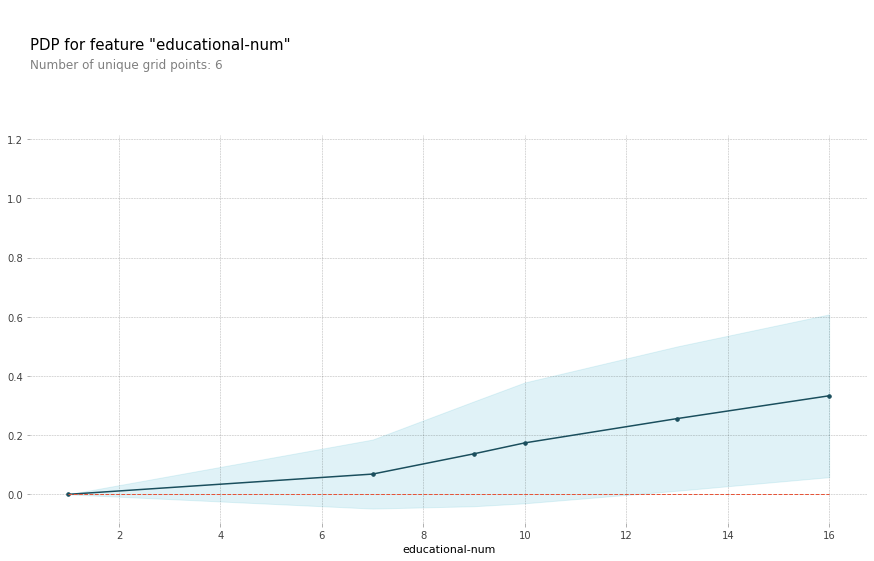

In [42]:
# Partial Dependence Plot: educational-num
feature = 'educational-num'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=X_train_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

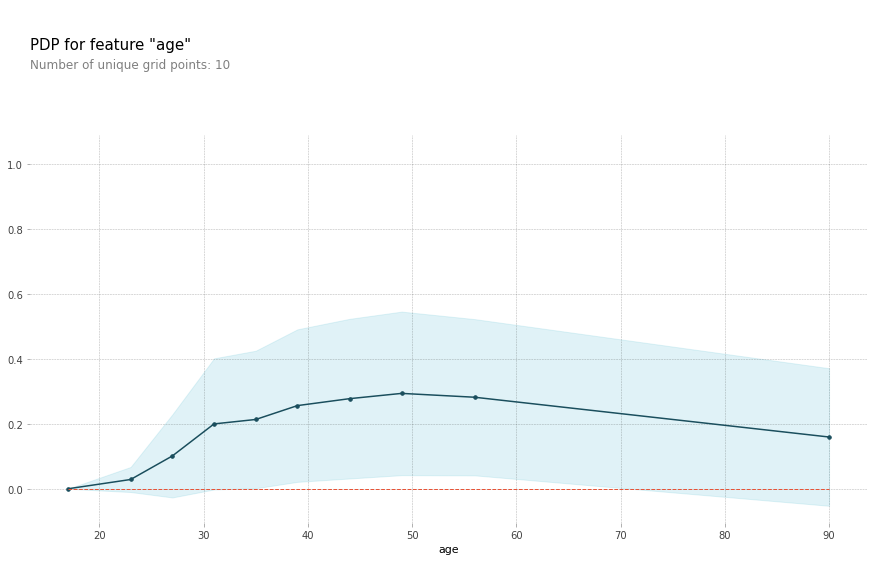

In [43]:
# Partial Dependence Plot: age
feature = 'age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=X_train_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

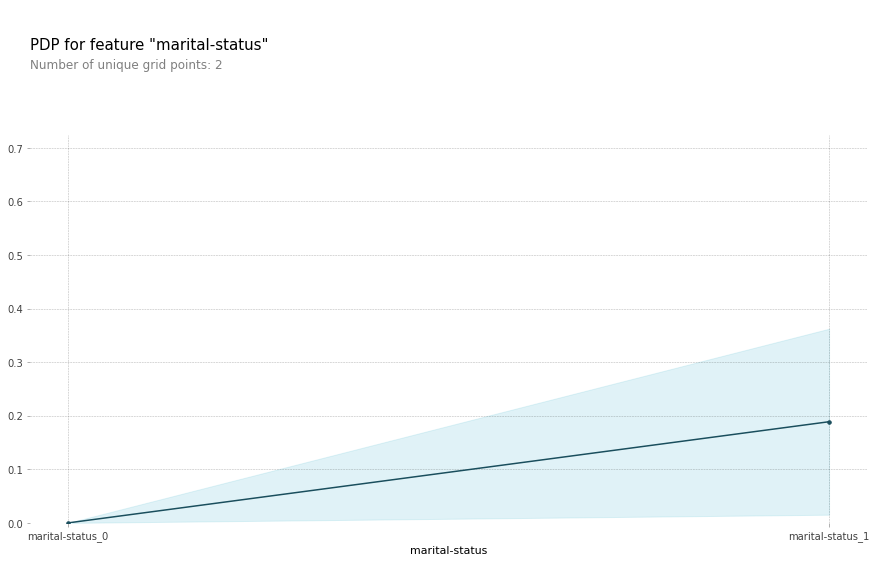

In [44]:
# Partial Dependence Plot: marital-status
feature = 'marital-status'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=X_train_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

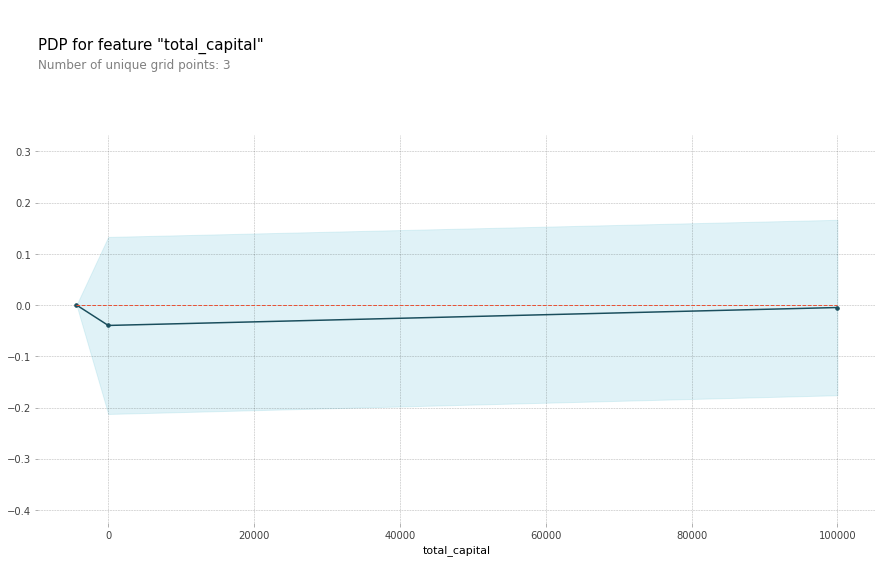

In [45]:
# Partial Dependence Plot: total_capital
feature = 'total_capital'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_train_encoded, model_features=X_train_encoded.columns, feature=feature)
pdp.pdp_plot(pdp_dist, feature); 

In [46]:
# Shap force plot
import json
import sklearn
import shap

explainer = shap.TreeExplainer(model)
row = X_test.iloc[:100]
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

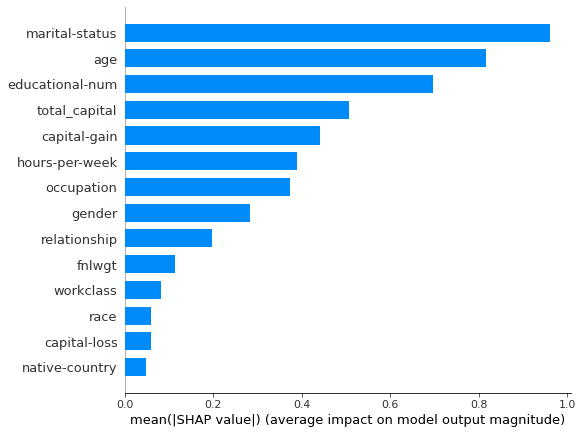

In [47]:
# Shap summary plot
shap.summary_plot(shap_values, X_test.iloc[:100], plot_type="bar")

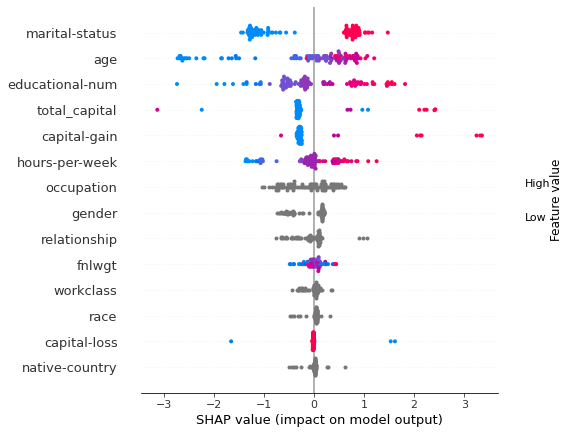

In [48]:
shap.summary_plot(shap_values, X_test.iloc[:100])

### üëâüèº Ï†ïÎ¶¨
- positive/negativeÎ•º Îñ†ÎÇò ÌÉÄÍ≤ü Î≥ÄÏàòÍ∞Ä Í∞ÄÏû• ÌÅ¨Í≤å ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÌäπÏÑ±ÏùÄ `marital status`, `age`, `educational-num`, `total capital` ÏàúÏûÑ
- `Í≤∞Ìòº Í¥ÄÍ≥Ñ(marital status)`, `ÎÇòÏù¥(age)`, `ÍµêÏú°ÏàòÏ§Ä(eduacational-num)`, `ÏûêÎ≥∏Ï¥ùÌï©Í≥Ñ(total capital)`, `ÏûêÎ≥∏Ïù¥Ïùµ(capital-gain)`ÏùÄ ÌäπÏÑ±Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù ÌÉÄÍ≤üÏóê negativeÌïú ÏòÅÌñ•ÏùÑ Ï£ºÍ≥†, ÌäπÏÑ±Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù positiveÌïú ÏòÅÌñ•ÏùÑ Ï§å